## Random Forest - Credit Default Prediction

### Objective

Predict whether a given customer will default or not. Credit default is one of the most important problems in the banking and risk analytics industry. There are various attributes which can be used to predict the default, such as demographic data (age, income, employment status, etc.), (credit) behavioural data (past loans, payment, number of times a credit payment has been delayed by the customer etc.)

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

### Data Description

There are 25 variables present in the dataset with 24 independent variable and 1 dependent variable

    Name            Descriptio        
    ID:             ID of each client
    LIMIT_BAL:      Amount of given credit in NT dollars (includes individual and family/supplementary credit)
    SEX:            Gender (1=male, 2=female)
    EDUCATION:      (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE:       Marital status (1=married, 2=single, 3=others)
    AGE:            Age in years
    PAY_0:          Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two                       months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2:          Repayment status in August, 2005 (scale same as above)
    PAY_3:          Repayment status in July, 2005 (scale same as above)
    PAY_4:          Repayment status in June, 2005 (scale same as above)
    PAY_5:          Repayment status in May, 2005 (scale same as above)
    PAY_6:          Repayment status in April, 2005 (scale same as above)
    BILL_AMT1:      Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2:      Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3:      Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4:      Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5:      Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6:      Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1:       Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2:       Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3:       Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4:       Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5:       Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6:       Amount of previous payment in April, 2005 (NT dollar)
    defaulted:      Default payment (1=yes, 0=no)

In [268]:
# import necessary libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Load the dataset

In [269]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv(r"C:\Users\91973\Desktop\Data_Science\Course_3_Machine_Learning_2\Random Forest\credit-card-default.csv")

In [270]:
df.shape

(30000, 25)

Inspecting the Dataframe

In [271]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [272]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


There is no null value present in the dataset

In [274]:
# Check Categorical Variable
df[['SEX','EDUCATION','MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In education and Marriage column there are values which are not provided in the data description. These are: 
Education: 0 and Marriage: 0. 

Let us make 0, 5 and 6 of education into 4.

In [275]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [276]:
a = list(df['EDUCATION'])
for i in range(len(a)):
    if a[i]==0:
        a[i]=a[i]+4
    elif a[i]==5:
        a[i]=a[i]-1
    elif a[i]==6:
        a[i]=a[i]-2 
a =pd.DataFrame(a)
df['EDUCATION']=a
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [277]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Like Education, Also change 0 to 3 for Marriage

In [278]:
a = list(df['MARRIAGE'])
for i in range(len(a)):
    if a[i]==0:
        a[i]=a[i]+3
a =pd.DataFrame(a)
df['MARRIAGE']=a
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Model Building and Evalution

In [279]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [280]:
# Putting feature variable to X
X = df.drop('defaulted',axis=1)

# Putting response variable to y
y = df['defaulted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [281]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (21000, 24)
X_test: (9000, 24)
y_train: (21000,)
y_test: (9000,)


#### Random Forest with default hyperparameter

In [282]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [283]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [284]:
# Making predictions
predictions = rfc.predict(X_test)

In [285]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [286]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      6927
           1       0.68      0.37      0.48      2073

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.80      0.82      0.79      9000



In [287]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6562  365]
 [1298  775]]


In [288]:
print(accuracy_score(y_test,predictions))

0.8152222222222222


### Hyperparameter Tuning

***max_depth***

In [289]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score= True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [290]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.647359,0.057244,0.067551,0.012099,2,{'max_depth': 2},0.805714,0.797857,0.807143,0.799048,0.804524,0.802857,0.003710,4,0.803155,0.803810,0.803929,0.802381,0.804167,0.803488,0.000647
1,4.134508,0.067231,0.093290,0.016616,7,{'max_depth': 7},0.819762,0.818095,0.823333,0.816190,0.816905,0.818857,0.002544,2,0.836488,0.837679,0.836071,0.836964,0.837143,0.836869,0.000551
2,6.412468,0.083028,0.144471,0.002249,12,{'max_depth': 12},0.821667,0.818095,0.827619,0.818095,0.818333,0.820762,0.003687,1,0.887560,0.887262,0.887024,0.888095,0.888631,0.887714,0.000582
3,8.053461,0.110171,0.170834,0.019535,17,{'max_depth': 17},0.817857,0.816905,0.824524,0.820000,0.814762,0.818810,0.003316,3,0.930655,0.929940,0.928631,0.930238,0.930595,0.930012,0.000737


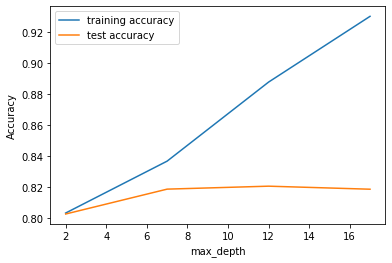

In [291]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Both Train and test accuracy increases along with max_depth. However, the train set accuracy keeps on increasing leads to an overfit. However, for test set, accuracy drops after a specific point

***n_estimators***
 -   The number of trees in the forest.integer, optional (default=10)

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

In [292]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score= True, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [293]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.607875,0.093437,0.080860,0.005902,100,{'n_estimators': 100},0.815476,0.812857,0.813571,0.808571,0.811190,0.812333,0.002330,4,0.814583,0.815655,0.814226,0.814583,0.812560,0.814321,0.001003
1,13.040081,0.090348,0.337779,0.035048,500,{'n_estimators': 500},0.814524,0.811190,0.814762,0.810476,0.814286,0.813048,0.001828,3,0.815417,0.815357,0.814702,0.815714,0.814940,0.815226,0.000360
2,26.900725,1.141444,0.731307,0.094396,900,{'n_estimators': 900},0.814762,0.811429,0.814762,0.810952,0.814762,0.813333,0.001756,1,0.814524,0.815298,0.814167,0.815000,0.814345,0.814667,0.000420
3,38.909041,0.233071,0.959081,0.071475,1300,{'n_estimators': 1300},0.814286,0.810952,0.815238,0.810714,0.815000,0.813238,0.001990,2,0.814167,0.815417,0.813750,0.815179,0.814167,0.814536,0.000645


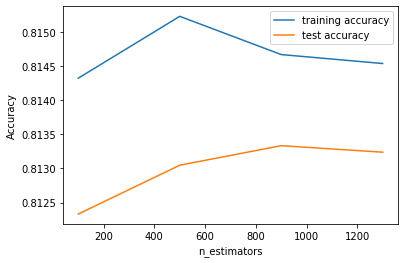

In [294]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


***max_features***

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [295]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24,30,36,40,45,50,60,64,72,90,100]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score= True, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [296]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.035946,0.118715,0.084129,0.010033,4,{'max_features': 4},0.814524,0.811905,0.814524,0.811190,0.810476,0.812524,0.001694,5,0.814643,0.815417,0.815714,0.816667,0.812560,0.815000,0.001382
1,5.334838,0.164845,0.092616,0.013330,8,{'max_features': 8},0.823095,0.820238,0.828095,0.820714,0.820476,0.822524,0.002968,1,0.824762,0.825714,0.823274,0.825238,0.825417,0.824881,0.000861
2,8.426589,0.223674,0.075499,0.004091,14,{'max_features': 14},0.822619,0.819286,0.828333,0.820238,0.819762,0.822048,0.003346,2,0.824583,0.825536,0.823869,0.825179,0.825000,0.824833,0.000571
3,9.923820,0.219324,0.064690,0.014805,20,{'max_features': 20},0.821905,0.818571,0.827619,0.820952,0.820238,0.821857,0.003080,4,0.825179,0.825833,0.823869,0.825417,0.825060,0.825071,0.000657
4,12.727520,1.002741,0.061695,0.015233,24,{'max_features': 24},0.824048,0.818571,0.826667,0.821905,0.819048,0.822048,0.003048,2,0.825119,0.826190,0.823512,0.825774,0.825000,0.825119,0.000914


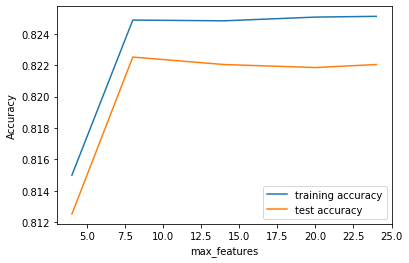

In [297]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Apparently, the training and test scores both seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features.

***min_samples_leaf***

The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node:

 - If int, then consider min_samples_leaf as the minimum number.
 - If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [298]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score= True, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [299]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.550593,0.176375,0.119845,0.007769,100,{'min_samples_leaf': 100},0.815000,0.817143,0.824048,0.810000,0.816667,0.816571,0.004514,1,0.817976,0.822798,0.819940,0.818631,0.823155,0.820500,0.002121
1,4.925228,0.045255,0.110062,0.006280,150,{'min_samples_leaf': 150},0.819762,0.819048,0.817619,0.810238,0.813095,0.815952,0.003679,2,0.820774,0.823393,0.816310,0.815952,0.811964,0.817679,0.003994
2,4.618323,0.052897,0.103847,0.007079,200,{'min_samples_leaf': 200},0.816905,0.813333,0.813810,0.809286,0.811667,0.813000,0.002513,3,0.818631,0.814762,0.811071,0.814464,0.811131,0.814012,0.002795
3,4.395608,0.060364,0.099680,0.007886,250,{'min_samples_leaf': 250},0.815476,0.810476,0.813571,0.808810,0.812381,0.812143,0.002328,4,0.812738,0.812321,0.810952,0.813155,0.813452,0.812524,0.000874
4,4.201090,0.039593,0.103080,0.006587,300,{'min_samples_leaf': 300},0.812381,0.809286,0.811190,0.807381,0.805952,0.809238,0.002364,5,0.812381,0.811012,0.809048,0.812262,0.808929,0.810726,0.001498


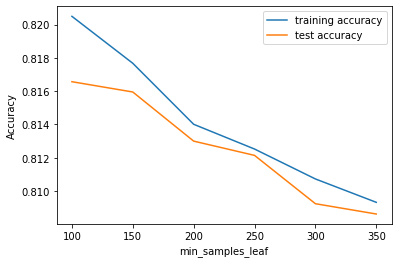

In [300]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***min_samples_split***

In [301]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score= True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [302]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.804208,0.262801,0.137936,0.005773,200,{'min_samples_split': 200},0.821667,0.819286,0.828571,0.819762,0.821190,0.822095,0.003355,5,0.827619,0.828333,0.826964,0.829226,0.827560,0.827940,0.000776
1,7.118830,0.043661,0.132553,0.004606,250,{'min_samples_split': 250},0.822857,0.820476,0.828333,0.819286,0.821667,0.822524,0.003139,3,0.825893,0.826726,0.825476,0.827143,0.826369,0.826321,0.000590
2,6.874773,0.102209,0.130095,0.015693,300,{'min_samples_split': 300},0.823333,0.819524,0.829524,0.821667,0.819524,0.822714,0.003693,1,0.825476,0.825714,0.822857,0.825893,0.825298,0.825048,0.001114
3,6.404698,0.400894,0.117682,0.018943,350,{'min_samples_split': 350},0.822619,0.819524,0.827143,0.821190,0.820714,0.822238,0.002645,4,0.824643,0.824643,0.822440,0.824940,0.824405,0.824214,0.000903
4,5.604597,0.038715,0.111740,0.013252,400,{'min_samples_split': 400},0.823571,0.819524,0.829524,0.820476,0.819762,0.822571,0.003766,2,0.823571,0.825417,0.823274,0.825119,0.824464,0.824369,0.000837


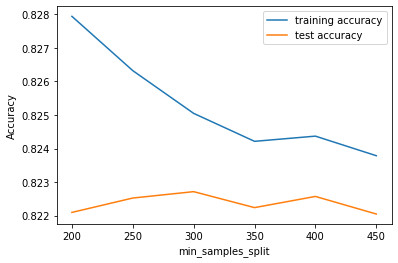

In [303]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

In [304]:
# Create the parameter grid based on the results of random search 
param_grid = {
     'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [305]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  7.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [306]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8225714285714285 using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 300, 'min_samples_split': 200, 'n_estimators': 100}


#### Fitting the final model with the best parameters obtained from grid search.

In [307]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=300, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=500)

In [308]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=300, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [309]:
# predict
predictions = rfc.predict(X_test)

In [310]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [311]:
print(confusion_matrix(y_test,predictions))

[[6611  316]
 [1333  740]]


In [312]:
# accuracy score
rfc.score(X_test,y_test)

0.8167777777777778

***ROC-AUC***

In [313]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [314]:
from sklearn import metrics

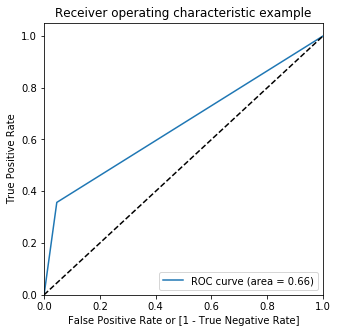

In [315]:
draw_roc( y_test, predictions)